In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import logging

import numpy as np
import seaborn as sns

Generate some data:

In [2]:
from batchglm.api.models.glm_nb import Simulator

sim = Simulator(num_observations=2000, num_features=100)
sim.generate_sample_description(num_batches=0)
sim.generate()

Run differential expression test:

In [3]:
logging.getLogger("tensorflow").setLevel(logging.WARNING)
logging.getLogger("batchglm").setLevel(logging.INFO)
logging.getLogger("diffxpy").setLevel(logging.INFO)

import diffxpy.api as de

test = de.test.lrt(
    data=sim.X,
    full_formula="~ 1 + condition",
    reduced_formula="~ 1",
    sample_description=sim.sample_description,
    batch_size=100,
    training_strategy="DEFAULT",
    dtype="float64"
)

INFO:diffxpy.testing.base:Fitting model...
Instructions for updating:
Use `tf.data.experimental.shuffle_and_repeat(...)`.


/Users/david.fischer/miniconda3/lib/python3.6/site-packages/tensorflow/python/util/tf_inspect.py:75: DeprecationWarning: inspect.getargspec() is deprecated, use inspect.signature() or inspect.getfullargspec()
  return _inspect.getargspec(target)
/Users/david.fischer/miniconda3/lib/python3.6/site-packages/tensorflow/python/util/tf_inspect.py:75: DeprecationWarning: inspect.getargspec() is deprecated, use inspect.signature() or inspect.getfullargspec()
  return _inspect.getargspec(target)
/Users/david.fischer/miniconda3/lib/python3.6/site-packages/tensorflow/python/util/tf_inspect.py:75: DeprecationWarning: inspect.getargspec() is deprecated, use inspect.signature() or inspect.getfullargspec()
  return _inspect.getargspec(target)
/Users/david.fischer/miniconda3/lib/python3.6/site-packages/tensorflow/python/util/tf_inspect.py:75: DeprecationWarning: inspect.getargspec() is deprecated, use inspect.signature() or inspect.getfullargspec()
  return _inspect.getargspec(target)


INFO:diffxpy.testing.base:Fitting model...


/Users/david.fischer/miniconda3/lib/python3.6/site-packages/tensorflow/python/util/tf_inspect.py:75: DeprecationWarning: inspect.getargspec() is deprecated, use inspect.signature() or inspect.getfullargspec()
  return _inspect.getargspec(target)
/Users/david.fischer/miniconda3/lib/python3.6/site-packages/tensorflow/python/util/tf_inspect.py:75: DeprecationWarning: inspect.getargspec() is deprecated, use inspect.signature() or inspect.getfullargspec()
  return _inspect.getargspec(target)
/Users/david.fischer/miniconda3/lib/python3.6/site-packages/tensorflow/python/util/tf_inspect.py:75: DeprecationWarning: inspect.getargspec() is deprecated, use inspect.signature() or inspect.getfullargspec()
  return _inspect.getargspec(target)
/Users/david.fischer/miniconda3/lib/python3.6/site-packages/tensorflow/python/util/tf_inspect.py:75: DeprecationWarning: inspect.getargspec() is deprecated, use inspect.signature() or inspect.getfullargspec()
  return _inspect.getargspec(target)


In [4]:
test.summary().iloc[:10,:]

,gene,pval,qval,log2fc,mean,grad,grad_red
0,0,0.000000e+00,0.000000e+00,0.689635,598.8370,-4.670042e-12,-3.577354e-07
1,1,5.633387e-09,6.259319e-09,0.232485,527.0690,-1.149146e-02,-6.962088e-01
2,2,0.000000e+00,0.000000e+00,0.696858,682.1405,-3.299827e-01,-2.940940e+00
3,3,8.109933e-10,9.215833e-10,0.436330,589.3695,-7.532545e-07,9.843407e-03
4,4,0.000000e+00,0.000000e+00,0.766130,651.2230,-4.499717e-03,-8.271894e-01
5,5,0.000000e+00,0.000000e+00,-0.717598,382.4815,-1.125927e-03,5.433327e-02
6,6,0.000000e+00,0.000000e+00,0.599318,720.1440,-1.933283e+00,-3.640176e-01
7,7,0.000000e+00,0.000000e+00,0.843431,674.0050,-1.720701e-06,-4.138521e-02
8,8,0.000000e+00,0.000000e+00,0.738775,692.8910,-1.482602e-03,-3.348016e-01
9,9,0.000000e+00,0.000000e+00,0.126001,516.5100,-5.510774e+00,3.345853e+00


`test.plot_volcano()` creates a volcano plot of p-values vs. fold-change:

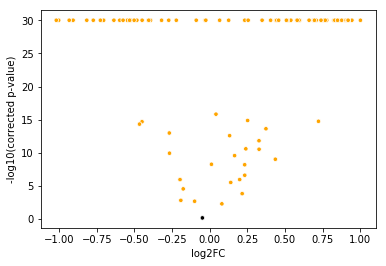

In [5]:
test.plot_volcano()

Show t-test results for comparison:

In [6]:
test_tt = de.test.t_test(
    data=sim.X, 
    grouping="condition", 
    gene_names=np.asarray(sim.X.features),
    sample_description=sim.sample_description
)

In [7]:
fig, ax = plt.subplots()
sns.scatterplot(x=test_tt.pval, y=test.pval, ax=ax)
ax.set(xlabel="t-test", ylabel='lrt')
fig.show()

/Users/david.fischer/miniconda3/lib/python3.6/site-packages/matplotlib/figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


Show wald test results for comparison:

In [8]:
test_wald = de.test.wald(
    data=sim.X, 
    formula="~1+condition",
    factor_loc_totest="condition", 
    gene_names=np.asarray(sim.X.features),
    sample_description=sim.sample_description
)

INFO:diffxpy.testing.base:Fitting model...


/Users/david.fischer/miniconda3/lib/python3.6/site-packages/tensorflow/python/util/tf_inspect.py:75: DeprecationWarning: inspect.getargspec() is deprecated, use inspect.signature() or inspect.getfullargspec()
  return _inspect.getargspec(target)
/Users/david.fischer/miniconda3/lib/python3.6/site-packages/tensorflow/python/util/tf_inspect.py:75: DeprecationWarning: inspect.getargspec() is deprecated, use inspect.signature() or inspect.getfullargspec()
  return _inspect.getargspec(target)
/Users/david.fischer/miniconda3/lib/python3.6/site-packages/tensorflow/python/util/tf_inspect.py:75: DeprecationWarning: inspect.getargspec() is deprecated, use inspect.signature() or inspect.getfullargspec()
  return _inspect.getargspec(target)
/Users/david.fischer/miniconda3/lib/python3.6/site-packages/tensorflow/python/util/tf_inspect.py:75: DeprecationWarning: inspect.getargspec() is deprecated, use inspect.signature() or inspect.getfullargspec()
  return _inspect.getargspec(target)


In [9]:
sns.scatterplot(x=test_tt.pval, y=test.pval)
fig.show()

/Users/david.fischer/miniconda3/lib/python3.6/site-packages/matplotlib/figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


`test.plot_diagnostics()` is a shortcut to directly show all diagnostics plots.

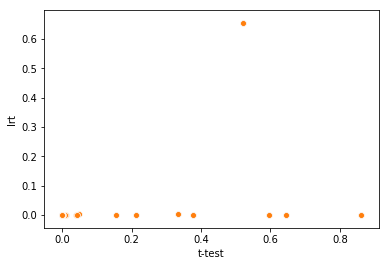

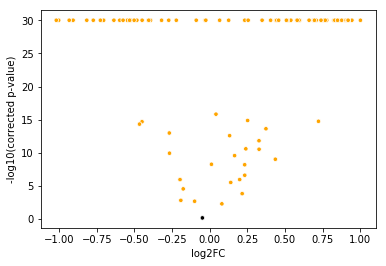

In [10]:
test.plot_diagnostics()